In [ ]:
import streamlit as st


2025-06-26 08:03:06.945 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 08:03:07.392 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-26 08:03:07.399 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 08:03:07.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 08:03:07.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 08:03:07.412 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 08:03:07.417 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 08:03:07.419 Thread 'MainThread': mi

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving e-shop clothing 2008 data description.txt to e-shop clothing 2008 data description (1).txt
Saving e-shop clothing 2008.csv to e-shop clothing 2008 (1).csv


In [ ]:
import pandas as pd


df = pd.read_csv("/content/e-shop clothing 2008.csv")


print(df.head())


  year;month;day;order;country;session ID;page 1 (main category);page 2 (clothing model);colour;location;model photography;price;price 2;page
0                 2008;4;1;1;29;1;1;A13;1;5;1;28;2;1                                                                                         
1                 2008;4;1;2;29;1;1;A16;1;6;1;33;2;1                                                                                         
2                 2008;4;1;3;29;1;2;B4;10;2;1;52;1;1                                                                                         
3                 2008;4;1;4;29;1;2;B17;6;6;2;38;2;1                                                                                         
4                  2008;4;1;5;29;1;2;B8;4;3;2;52;1;1                                                                                         


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
print(df.isnull().sum())


year;month;day;order;country;session ID;page 1 (main category);page 2 (clothing model);colour;location;model photography;price;price 2;page    0
dtype: int64


In [ ]:
print(df.columns)




Index(['year;month;day;order;country;session ID;page 1 (main category);page 2 (clothing model);colour;location;model photography;price;price 2;page'], dtype='object')


In [ ]:
from google.colab import files
uploaded = files.upload()




Saving e-shop clothing 2008.csv to e-shop clothing 2008 (2).csv


In [ ]:
import pandas as pd

df = pd.read_csv("/content/e-shop clothing 2008.csv", sep=';')
print(df.columns)


Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'price 2', 'page'],
      dtype='object')


In [ ]:
print(df.isnull().sum())


year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols = ['colour', 'country', 'page 1 (main category)', 'model photography', 'location']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
print(df.head())


   year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       28           1                       0   
1  2008      4    1      2       28           1                       0   
2  2008      4    1      3       28           1                       1   
3  2008      4    1      4       28           1                       1   
4  2008      4    1      5       28           1                       1   

  page 2 (clothing model)  colour  location  model photography  price  \
0                     A13       0         4                  0     28   
1                     A16       0         5                  0     33   
2                      B4       9         1                  0     52   
3                     B17       5         5                  1     38   
4                      B8       3         2                  1     52   

   price 2  page  
0        2     1  
1        2     1  
2        1     1  
3        2     1  
4        1     

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['price']

df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.head())


   year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       28           1                       0   
1  2008      4    1      2       28           1                       0   
2  2008      4    1      3       28           1                       1   
3  2008      4    1      4       28           1                       1   
4  2008      4    1      5       28           1                       1   

  page 2 (clothing model)  colour  location  model photography     price  \
0                     A13       0         4                  0 -1.259355   
1                     A16       0         5                  0 -0.860888   
2                      B4       9         1                  0  0.653286   
3                     B17       5         5                  1 -0.462421   
4                      B8       3         2                  1  0.653286   

   price 2  page  
0        2     1  
1        2     1  
2        1     1  
3        2     1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


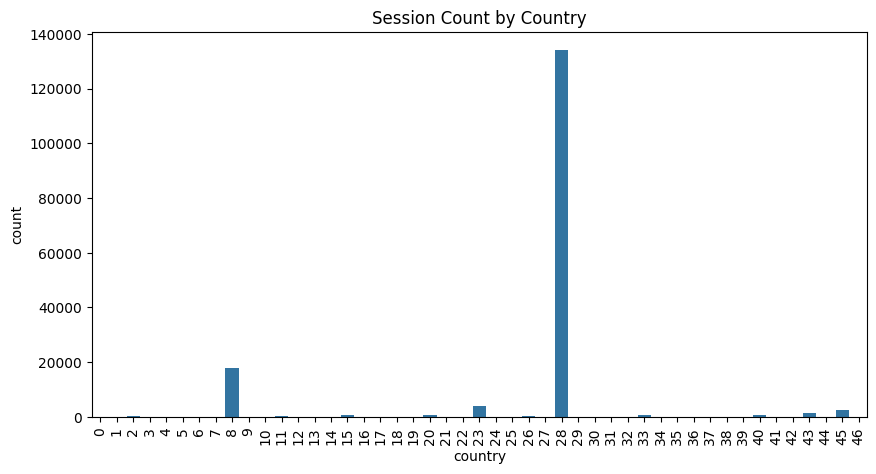

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='country', data=df)
plt.title("Session Count by Country")
plt.xticks(rotation=90)
plt.show()


In [ ]:
print(df.dtypes)



year                         int64
month                        int64
day                          int64
order                        int64
country                      int64
session ID                   int64
page 1 (main category)       int64
page 2 (clothing model)     object
colour                       int64
location                     int64
model photography            int64
price                      float64
price 2                      int64
page                         int64
dtype: object


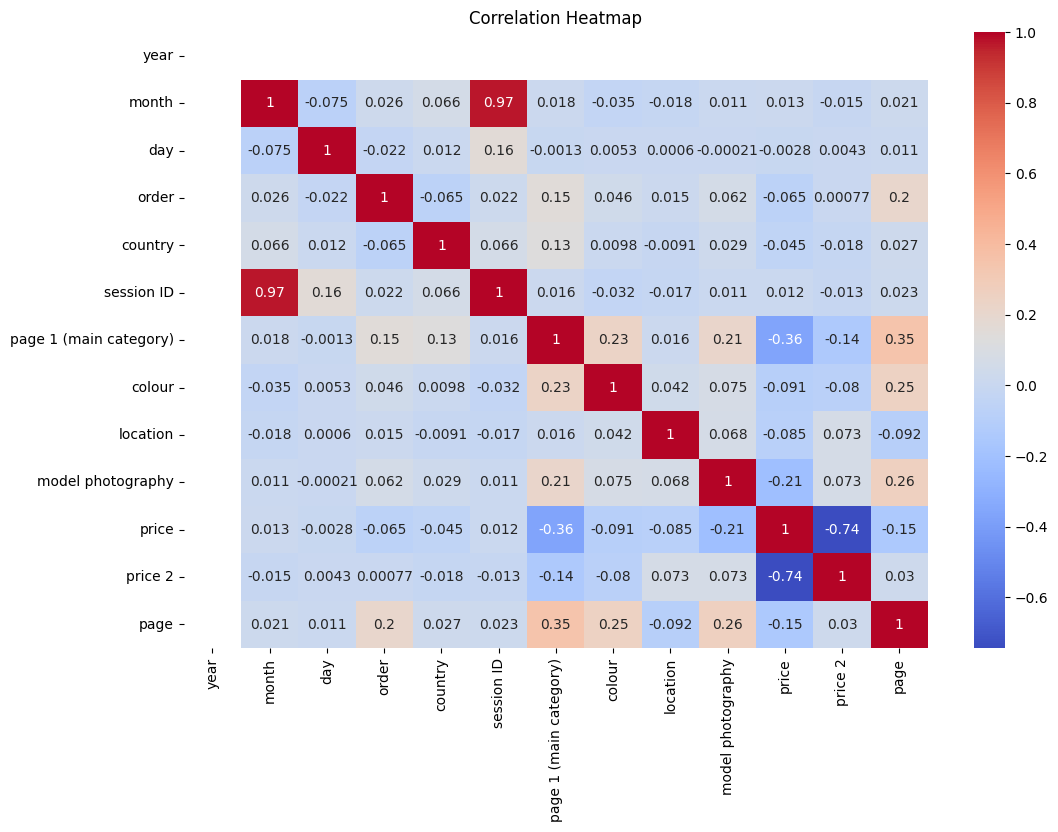

In [ ]:
numeric_df = df.drop(columns=['page 2 (clothing model)'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['page 2 (clothing model)'] = le.fit_transform(df['page 2 (clothing model)'])


In [ ]:
X = df.drop(columns=['session ID'])



In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X)

df['cluster'] = kmeans.labels_
print(df['cluster'].value_counts())


cluster
1    64321
0    51681
2    49472
Name: count, dtype: int64


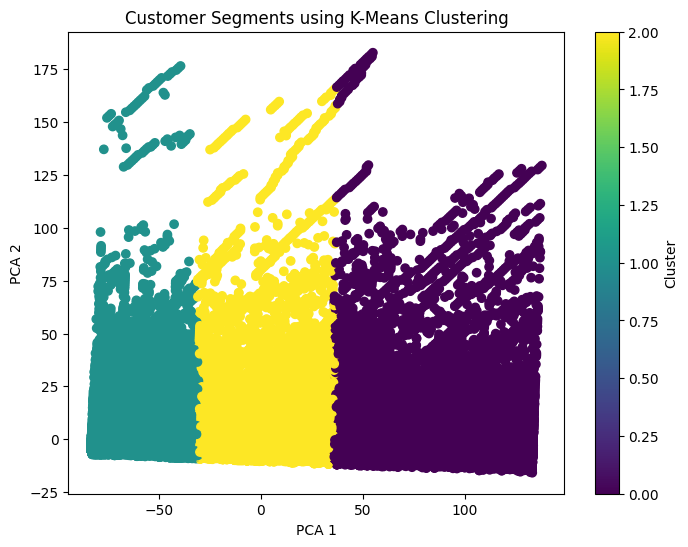

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title("Customer Segments using K-Means Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
cluster_profile = df.groupby('cluster').mean()
print(cluster_profile)


           year     month        day      order    country    session ID  \
cluster                                                                    
0        2008.0  5.655947  14.482982  12.569881  27.239392  12399.761305   
1        2008.0  5.584832  14.518789   7.481289  25.122402  12052.881983   
2        2008.0  5.514069  14.575477   9.979564  25.687803  11709.027692   

         page 1 (main category)  page 2 (clothing model)    colour  location  \
cluster                                                                        
0                      2.749734               157.410634  5.362919  2.175055   
1                      0.226660                25.298518  3.249530  2.433233   
2                      1.518334                79.427575  7.658211  2.117481   

         model photography     price   price 2      page  
cluster                                                   
0                 0.420619 -0.481175  1.434918  2.253749  
1                 0.193949  0.328502  1.6

In [ ]:
print(df['cluster'].value_counts())


cluster
1    64321
0    51681
2    49472
Name: count, dtype: int64


In [ ]:
for i in df['cluster'].unique():
    popular_country = df[df['cluster'] == i]['country'].value_counts().idxmax()
    print(f"Most popular country in cluster {i} is: {popular_country}")


Most popular country in cluster 1 is: 28
Most popular country in cluster 2 is: 28
Most popular country in cluster 0 is: 28


In [ ]:
for i in df['cluster'].unique():
    popular_category = df[df['cluster'] == i]['page 1 (main category)'].value_counts().idxmax()
    print(f"Most popular category in cluster {i} is: {popular_category}")


Most popular category in cluster 1 is: 0
Most popular category in cluster 2 is: 2
Most popular category in cluster 0 is: 3


In [ ]:
for i in df['cluster'].unique():
    avg_price = df[df['cluster'] == i]['price'].mean()
    print(f"Average price in cluster {i}: {avg_price:.2f}")


Average price in cluster 1: 0.33
Average price in cluster 2: 0.08
Average price in cluster 0: -0.48


/tmp/ipython-input-44-2348286020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df, palette='viridis')


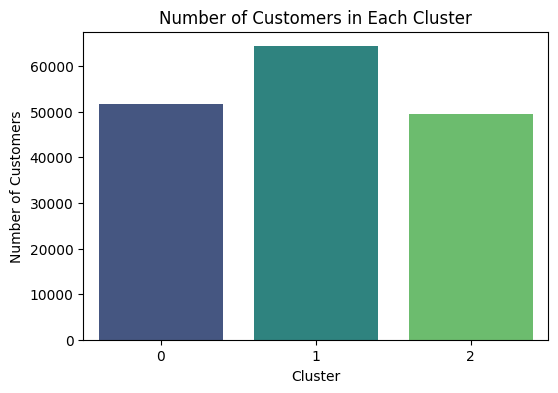

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='cluster', data=df, palette='viridis')
plt.title("Number of Customers in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()


/tmp/ipython-input-45-3949383329.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='price', data=avg_price_per_cluster, palette='viridis')


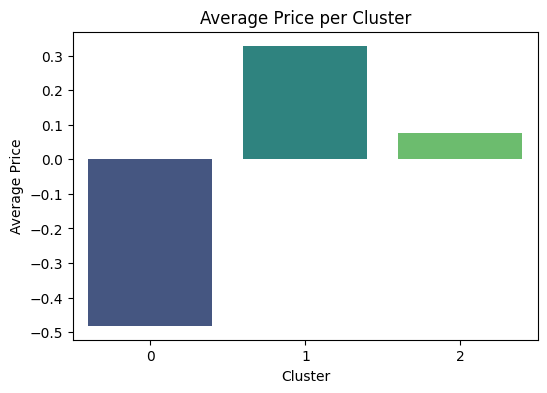

In [ ]:
avg_price_per_cluster = df.groupby('cluster')['price'].mean().reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='cluster', y='price', data=avg_price_per_cluster, palette='viridis')
plt.title("Average Price per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Price")
plt.show()


/tmp/ipython-input-46-2688659449.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='page 1 (main category)', data=popular_category_per_cluster, palette='viridis')


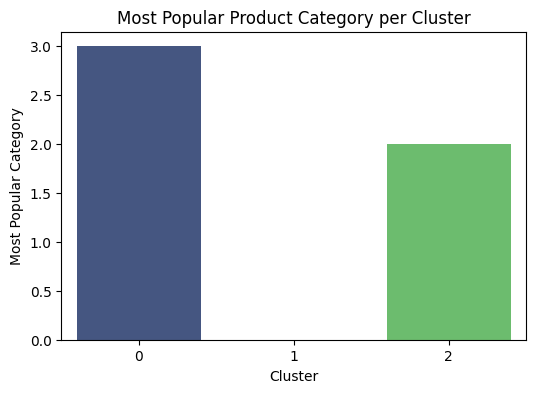

In [ ]:
popular_category_per_cluster = df.groupby('cluster')['page 1 (main category)'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='cluster', y='page 1 (main category)', data=popular_category_per_cluster, palette='viridis')
plt.title("Most Popular Product Category per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Most Popular Category")
plt.show()


/tmp/ipython-input-47-1544000824.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='country', data=popular_country_per_cluster, palette='viridis')


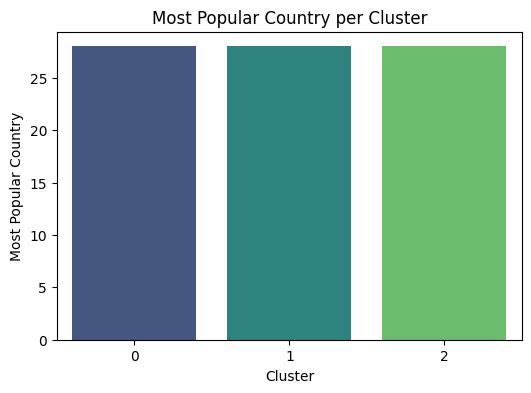

In [ ]:
popular_country_per_cluster = df.groupby('cluster')['country'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='cluster', y='country', data=popular_country_per_cluster, palette='viridis')
plt.title("Most Popular Country per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Most Popular Country")
plt.show()



In [ ]:
X = df.drop(columns=['price', 'cluster', 'session ID'])
y = df['price']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 0.3490369860866754
Mean Squared Error (MSE): 0.21269038832265003
R2 Score: 0.788483765010108


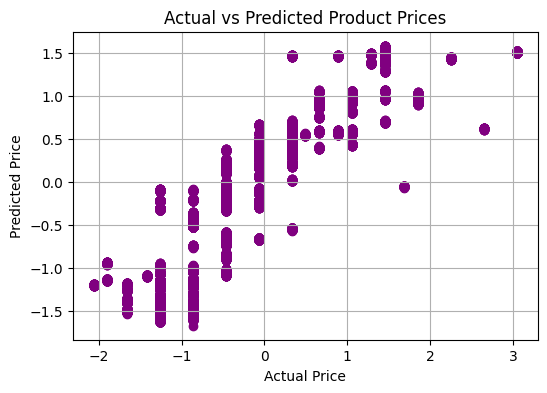

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='purple')
plt.title("Actual vs Predicted Product Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()


In [ ]:
session_clicks = df.groupby('session ID').size().reset_index(name='click_count')

df = df.merge(session_clicks, on='session ID', how='left')

print(df[['session ID', 'click_count']].head())


   session ID  click_count
0           1            9
1           1            9
2           1            9
3           1            9
4           1            9


In [ ]:
category_views = df.groupby('session ID')['page 1 (main category)'].nunique().reset_index(name='unique_categories_viewed')

df = df.merge(category_views, on='session ID', how='left')

print(df[['session ID', 'unique_categories_viewed']].head())


   session ID  unique_categories_viewed
0           1                         4
1           1                         4
2           1                         4
3           1                         4
4           1                         4


In [ ]:
session_value = df.groupby('session ID')['price'].sum().reset_index(name='total_session_value')

df = df.merge(session_value, on='session ID', how='left')

print(df[['session ID', 'total_session_value']].head())


   session ID  total_session_value
0           1            -1.213137
1           1            -1.213137
2           1            -1.213137
3           1            -1.213137
4           1            -1.213137


In [ ]:
X = df.drop(columns=['price', 'cluster', 'session ID', 'page 2 (clothing model)'])
y = df['price']
print(X.columns)


Index(['year', 'month', 'day', 'order', 'country', 'page 1 (main category)',
       'colour', 'location', 'model photography', 'price 2', 'page',
       'click_count', 'unique_categories_viewed', 'total_session_value'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 0.34502377364059345
Mean Squared Error (MSE): 0.2127574536872637
R2 Score: 0.7884170698785924


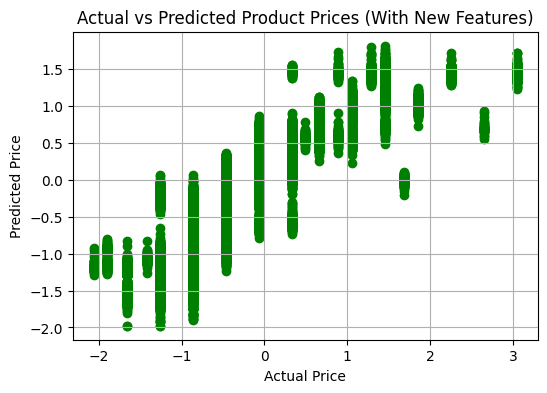

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='green')
plt.title("Actual vs Predicted Product Prices (With New Features)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()


In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

st.title("📊 Clickstream Customer Conversion Project Report")

uploaded_file = st.file_uploader("Upload your preprocessed CSV file", type=['csv'])
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file, sep=';')
    st.write("### 📑 Dataset Preview")
    st.dataframe(df.head())

    st.write("### 📊 Country Distribution")
    fig1, ax1 = plt.subplots()
    sns.countplot(x='country', data=df, ax=ax1)
    plt.xticks(rotation=90)
    st.pyplot(fig1)

    st.write("### 📊 Price Distribution")
    fig2, ax2 = plt.subplots()
    sns.histplot(df['price'], kde=True, ax=ax2)
    st.pyplot(fig2)

    session_clicks = df.groupby('session ID').size().reset_index(name='click_count')
    df = df.merge(session_clicks, on='session ID', how='left')

    st.write("### 📈 K-Means Clustering (3 Segments)")
    X_clust = df.drop(columns=['price', 'session ID', 'page 2 (clothing model)'])
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X_clust)
    df['cluster'] = kmeans.labels_
    st.dataframe(df[['session ID', 'cluster']].head())

    fig3, ax3 = plt.subplots()
    sns.countplot(x='cluster', data=df, palette='viridis', ax=ax3)
    st.pyplot(fig3)

    # Regression
    st.write("### 📉 Regression Model: Predicting Product Price")
    X = df.drop(columns=['price', 'session ID', 'page 2 (clothing model)', 'cluster'])
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    st.write("#### 📏 Regression Metrics:")
    st.write("MAE:", mean_absolute_error(y_test, y_pred))
    st.write("MSE:", mean_squared_error(y_test, y_pred))
    st.write("R² Score:", r2_score(y_test, y_pred))

    st.write("#### 📊 Actual vs Predicted Price")
    fig4, ax4 = plt.subplots()
    ax4.scatter(y_test, y_pred, color='blue')
    ax4.set_xlabel("Actual Price")
    ax4.set_ylabel("Predicted Price")
    ax4.set_title("Actual vs Predicted Product Price")
    st.pyplot(fig4)

    st.write("### 📌 Project Summary:")
    st.write("""
    ✅ Data Preprocessing: Cleaned missing values, encoded categorical columns, scaled numeric values
    ✅ EDA: Visualized country-wise sessions and price distributions
    ✅ Feature Engineering: Created click counts per session
    ✅ Clustering: Segmented customers into 3 groups based on behavior
    ✅ Regression: Built and evaluated a model to predict product price
    """)

else:
    st.write("⬆️ Please upload your CSV file to view the report.")



2025-06-26 09:07:58.597 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 09:07:58.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 09:07:58.600 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 09:07:58.601 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 09:07:58.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 09:07:58.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 09:07:58.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 09:07:58.605 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
df.to_csv("final_preprocessed_data.csv", index=False)


In [ ]:
from google.colab import files
files.download("final_preprocessed_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>